In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm,colors
from matplotlib.patches import ConnectionPatch
from plotnine import *
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"] = ["SimHei"] #解决中文字符乱码的问题
plt.rcParams["axes.unicode_minus"] = False #正常显示负号

In [2]:
df = pd.read_excel("./data.xlsx")
df.head(2)

,stkcd,year,证券代码,行业代码,Size,Lev,ROA,ROE,ATO,Cashflow,...,FirmAge,Dturn,INST,Mshare,Mfee,Occupy,Big4,Opinion,Industry,Year
0,1,2000,1,J66,24.931349,0.929510,0.009116,0.172282,0.025756,0.023667,...,2.639057,-0.052332,0.000821,0.000484,NaN,0.011876,0.0,1.0,J,2000
1,1,2001,1,J66,25.511816,0.969801,0.004323,0.112624,0.022763,0.121889,...,2.708050,-0.064284,0.004271,0.000484,NaN,0.003627,0.0,1.0,J,2001


In [3]:
data = df.copy()
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49284 entries, 0 to 49283
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stkcd     49284 non-null  int64  
 1   year      49284 non-null  int64  
 2   证券代码      49284 non-null  int64  
 3   行业代码      49284 non-null  object 
 4   Size      49281 non-null  float64
 5   Lev       49281 non-null  float64
 6   ROA       49280 non-null  float64
 7   ROE       48714 non-null  float64
 8   ATO       49280 non-null  float64
 9   Cashflow  49281 non-null  float64
 10  REC       48906 non-null  float64
 11  INV       48309 non-null  float64
 12  FIXED     49278 non-null  float64
 13  Growth    49029 non-null  float64
 14  Loss      49284 non-null  int64  
 15  Board     49211 non-null  float64
 16  Indep     49211 non-null  float64
 17  Dual      49284 non-null  int64  
 18  Top1      46192 non-null  float64
 19  Top5      46192 non-null  float64
 20  Top10     46192 non-null  fl

# 数据清洗

In [4]:
# 证券代码
stkid = sorted(list(set(data['stkcd'])))
processed_data = pd.DataFrame(data=None,columns=data.columns)

# 对每个股票处理缺失值
for i in stkid:
    temp = data[data['stkcd'] == i]
    
    # 缺失时填充上一年的值
    temp['Size'].fillna(method='ffill',inplace=True) 
    temp['Lev'].fillna(method='ffill',inplace=True)
    temp['ROA'].fillna(method='ffill',inplace=True) 
    temp['ROE'].fillna(method='ffill',inplace=True)  
    temp['ATO'].fillna(method='ffill',inplace=True) 
    temp['Cashflow'].fillna(method='ffill',inplace=True) 
    temp['REC'].fillna(method='ffill',inplace=True) 
    temp['INV'].fillna(method='ffill',inplace=True)
    temp['Growth'].fillna(method='bfill',inplace=True)
    temp['FIXED'].fillna(method='ffill',inplace=True)
    temp['Board'].fillna(method='ffill',inplace=True)
    temp['Indep'].fillna(method='ffill',inplace=True)
    temp['Top1'].fillna(method='ffill',inplace=True)
    temp['Top5'].fillna(method='ffill',inplace=True)
    temp['Top10'].fillna(method='ffill',inplace=True)
    temp['Balance1'].fillna(method='ffill',inplace=True)
    temp['Balance2'].fillna(method='ffill',inplace=True)
    temp['BM'].fillna(method='ffill',inplace=True)
    temp['TobinQ'].fillna(method='ffill',inplace=True)
    temp['SOE'].fillna(method='ffill',inplace=True)
    temp['Dturn'].fillna(method='ffill',inplace=True)
    temp['INST'].fillna(method='ffill',inplace=True)
    temp['Mshare'].fillna(method='ffill',inplace=True)
    temp['Mfee'].fillna(method='ffill',inplace=True)
    temp['Occupy'].fillna(method='ffill',inplace=True)
    temp['Big4'].fillna(method='ffill',inplace=True)
    temp['Opinion'].fillna(method='ffill',inplace=True)
    

    # 仍缺失时则填充后一年的值
    temp['ROA'].fillna(method='bfill',inplace=True)
    temp['ROE'].fillna(method='bfill',inplace=True)
    temp['ATO'].fillna(method='bfill',inplace=True)
    temp['REC'].fillna(method='bfill',inplace=True)
    temp['INV'].fillna(method='bfill',inplace=True)
    temp['Growth'].fillna(method='bfill',inplace=True)
    temp['Board'].fillna(method='bfill',inplace=True)
    temp['Indep'].fillna(method='bfill',inplace=True)
    temp['Top1'].fillna(method='bfill',inplace=True)
    temp['Top5'].fillna(method='bfill',inplace=True)
    temp['Top10'].fillna(method='bfill',inplace=True)
    temp['Balance1'].fillna(method='bfill',inplace=True)
    temp['Balance2'].fillna(method='bfill',inplace=True)
    temp['BM'].fillna(method='bfill',inplace=True)
    temp['TobinQ'].fillna(method='bfill',inplace=True)
    temp['SOE'].fillna(method='bfill',inplace=True)
    temp['Dturn'].fillna(method='bfill',inplace=True)
    temp['INST'].fillna(method='bfill',inplace=True)
    temp['Mshare'].fillna(method='bfill',inplace=True)
    temp['Mfee'].fillna(method='bfill',inplace=True)
    temp['Occupy'].fillna(method='bfill',inplace=True)
    temp['Big4'].fillna(method='bfill',inplace=True)
    temp['Opinion'].fillna(method='bfill',inplace=True)
    
    processed_data = processed_data.append(temp)

In [5]:
# 删除有缺失值的行
processed_data.dropna(inplace=True)    
# year和Year两列数据完全相同，删除Year列
# processed_data[processed_data['year'] != processed_data['Year']]
# stkcd和证券代码两列完全相同，删证券代码列
# processed_data[processed_data['stkcd'] != processed_data['证券代码']]
processed_data.drop(['Year','证券代码'],axis=1,inplace=True)

processed_data.reset_index(drop=True, inplace=True)
processed_data.head(2)

,stkcd,year,行业代码,Size,Lev,ROA,ROE,ATO,Cashflow,REC,...,ListAge,FirmAge,Dturn,INST,Mshare,Mfee,Occupy,Big4,Opinion,Industry
0,2,2000,K70,22.449997,0.472516,0.061516,0.121745,0.747989,0.015305,0.091829,...,2.302585,2.564949,0.140026,0.073978,0.000920,0.041797,0.023973,0.0,1.0,K
1,2,2001,K70,22.592436,0.517797,0.063312,0.126214,0.738439,-0.185804,0.073655,...,2.397895,2.639057,-0.172154,0.103209,0.000519,0.061306,0.018759,1.0,1.0,K


In [6]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47945 entries, 0 to 47944
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stkcd     47945 non-null  object 
 1   year      47945 non-null  object 
 2   行业代码      47945 non-null  object 
 3   Size      47945 non-null  float64
 4   Lev       47945 non-null  float64
 5   ROA       47945 non-null  float64
 6   ROE       47945 non-null  float64
 7   ATO       47945 non-null  float64
 8   Cashflow  47945 non-null  float64
 9   REC       47945 non-null  float64
 10  INV       47945 non-null  float64
 11  FIXED     47945 non-null  float64
 12  Growth    47945 non-null  float64
 13  Loss      47945 non-null  object 
 14  Board     47945 non-null  float64
 15  Indep     47945 non-null  float64
 16  Dual      47945 non-null  object 
 17  Top1      47945 non-null  float64
 18  Top5      47945 non-null  float64
 19  Top10     47945 non-null  float64
 20  Balance1  47945 non-null  fl

In [7]:
processed_data.to_csv("./processed_data.csv")

In [8]:
# 处理前股票个数
len(list(set(data['stkcd'])))

4671

In [9]:
# 处理后股票个数
len(list(set(processed_data['stkcd'])))

4016

# 指标相关性分析

In [10]:
corr_data = processed_data.copy()
corr_data.drop(['SOE','Big4','Opinion'],axis=1,inplace=True)
corr = corr_data.corr() #获取相关系数
corr.reset_index(inplace=True)
codata=pd.melt(corr,id_vars='index',var_name='var',value_name='value')
codata['value'] = codata['value'].round(2)
codata['AbsValue']=np.abs(codata['value'])
codata.head(2)

,index,var,value,AbsValue
0,Size,Size,1.00,1.00
1,Lev,Size,-0.04,0.04


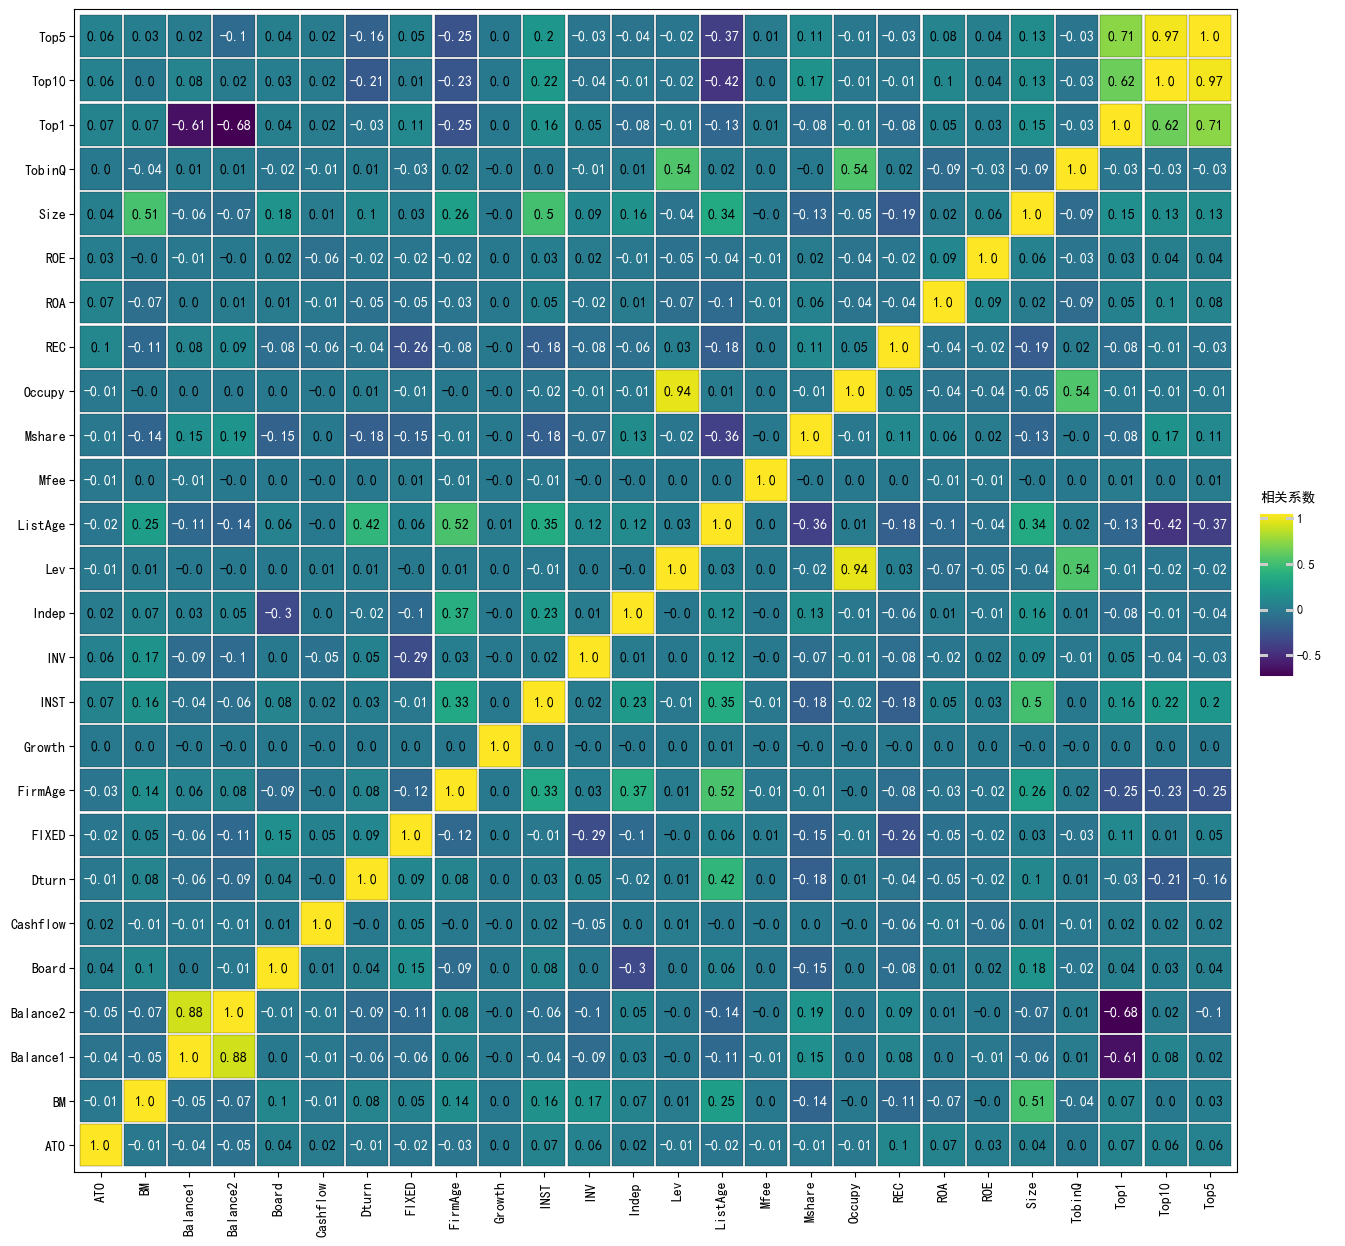

<ggplot: (-9223371925883246208)>

In [11]:
# 各指标的相关性瓦片图
text_color = np.array(['black']*len(codata['value']))
text_color[codata['value']<0] = 'white'
(
    ggplot(codata, aes(x='index', y='var', fill='value')) 
    + geom_tile(aes(width=.95, height=.95),color="black") 
    + geom_text(aes(label='value'), size=10, colour=text_color)
    + scale_fill_cmap(name ='相关系数')
    + coord_equal()
    + theme_matplotlib()
    + labs(x='',y='')
    + theme(dpi=100,figure_size=(15,15))
    + theme(axis_text_x=element_text(rotation=90))    
)

# 国企控股与非国企控股的证券差异 

In [12]:
newid = sorted(list(set(processed_data['stkcd'])))
Listyears = []      # 各证券上市年份
Firmyears = []      # 各证券成立年份
SOEchange = []      # 是否发生过企业类型转变
SOEchangeyear = []  # 发生转变的年份结点
SOElabel = []       # 0非国企，1国企，2国企转非国企，3非国企转国企，4转换超过两次

for i in newid:
    temp = processed_data[processed_data['stkcd'] == i]
    
    # 计算股票上市年份
    listyear = temp['year'].iloc[0]+1-np.exp(temp['ListAge'].iloc[0]).astype('int')
    Listyears.append(listyear)
    # 计算股票成立年份
    firmyear = temp['year'].iloc[0]+1-np.exp(temp['FirmAge'].iloc[0]).astype('int')
    Firmyears.append(firmyear)
    
    # 检查每个股票是否发生过国有变化
    SOEavg = sum(temp['SOE'])/(len(temp))
    if SOEavg in [0,1]:
        SOEchange.append(0)
        if SOEavg==0:
            SOElabel.append(0)
        else:
            SOElabel.append(1)
    else:
        SOEchange.append(1)
        SOEcheck = temp['SOE'] - temp['SOE'].shift(1)
        if -1 in SOEcheck.values and 1 in SOEcheck.values:
            SOElabel.append(4)
        if -1 in SOEcheck.values and 1 not in SOEcheck.values:
            SOElabel.append(2)
        if -1 not in SOEcheck.values and 1 in SOEcheck.values:
            SOElabel.append(3)
          
    SOEcheck = temp['SOE'] - temp['SOE'].shift(1)
    lst = []
    if -1 in SOEcheck.values:
        ind1 = SOEcheck[SOEcheck.values == -1].index
        lst1 = list(temp['year'].loc[ind1].values)
    else:
        lst1 = []
    lst.append(lst1)
    if 1 in SOEcheck.values:
        ind2 = SOEcheck[SOEcheck.values == 1].index
        lst2 = list(temp['year'].loc[ind2].values)
    else:
        lst2 = []
    lst.append(lst2)
    SOEchangeyear.append(lst)

In [13]:
stk = pd.DataFrame({'stkcd':newid,
                    'listyear':Listyears,
                    'firmyear':Firmyears,
                    'SOEchange':SOEchange,
                    'SOElabel':SOElabel,
                    'SOEchangeyear':SOEchangeyear})
stk.head(2)

,stkcd,listyear,firmyear,SOEchange,SOElabel,SOEchangeyear
0,2,1991,1989,1,2,"[[2007], []]"
1,4,1991,1986,0,0,"[[], []]"


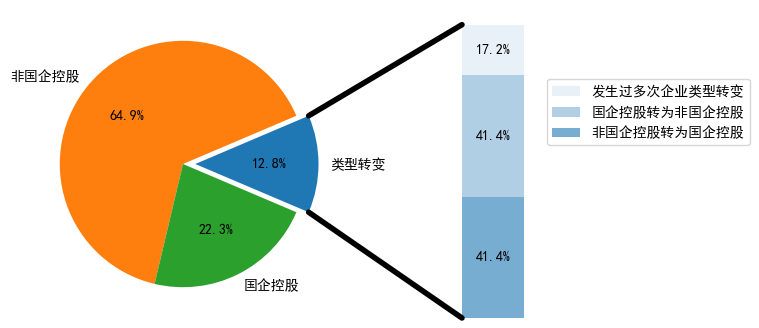

In [14]:
# 带细分类的饼图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.subplots_adjust(wspace=0)

# 饼图
overall_ratios = [.128, .649, .223]    # 大类比例
labels = ['类型转变', '非国企控股', '国企控股']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# 条形图
other_ratios = [.414, .414, .172]     # 细分类比例
other_labels = ['非国企控股转为国企控股', '国企控股转为非国企控股', '发生过多次企业类型转变']
bottom = 1
width = .2

for j, (height, label) in enumerate(reversed([*zip(other_ratios, other_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.1%}"], label_type='center')

ax2.legend(loc='upper right',bbox_to_anchor = (1.35,0.8))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# 两个图之间的连接线
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(other_ratios)

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [15]:
# 记录所有股票发生国企与非国企类型转变年份:从SOEchangeyear中获取
# year1:国企变为非国企
# year2:非国企变为国企
year1 = []
year2 = []
for years in SOEchangeyear:
    year1 = year1 + years[0]
    year2 = year2 + years[1]
year11 = pd.Series(year1)
year22 = pd.Series(year2)

# 统计每年两种转变的个数
s1 = year11.value_counts().sort_index()
s2 = year22.value_counts().sort_index()
chyear = pd.DataFrame({'年份':s1.index,'变为非国企控股':s1.values,'变为国企控股':s2.values})
chyear = pd.melt(chyear, id_vars='年份')
chyear['年份'] = pd.Categorical(chyear['年份'], ordered=True, categories=s1.index)  #属性变量不区分大小
chyear.columns = ['年份','类型变化','数量']

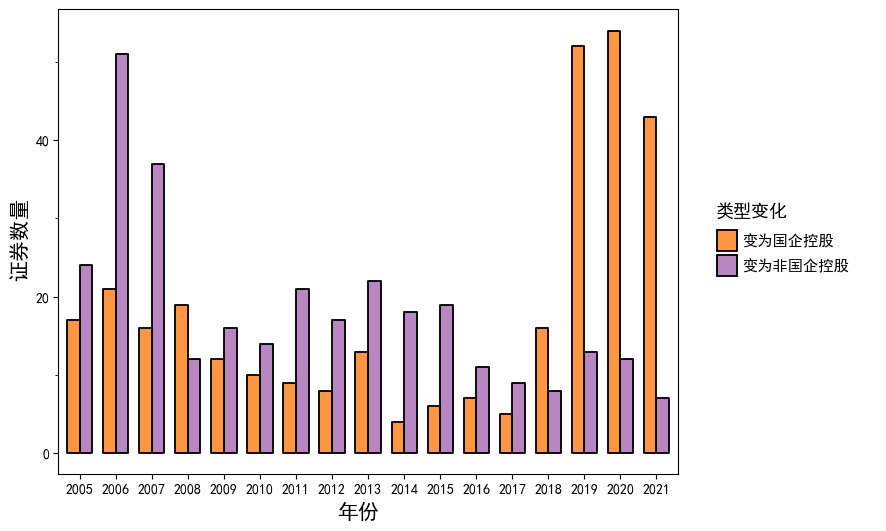

<ggplot: (-9223371925886073256)>

In [16]:
(
    ggplot(chyear, aes(x='年份', y='数量', fill='类型变化'))
    + geom_bar(stat='identity', color='black', position='dodge', width=0.7, size=0.75) #dodge表示并排表示
    + scale_fill_manual(values=['#FF9641','#B887C3'])
    #+ scale_fill_manual(values=['#E7B800', '#00AFBB'])
    + theme_matplotlib()
    + labs(x='年份',y='证券数量')
    + theme(aspect_ratio =0.75,dpi=100,figure_size=(8,4),
            axis_title=element_text(size=15,face="plain",color="black"),
            axis_text = element_text(size=10,face="plain",color="black"),
            legend_text = element_text(size=11,face="plain",color="black"),
            legend_title = element_text(size=13,face="plain",color="black"),
            legend_background=element_blank())
)

In [17]:
# 国企控股企业数与非国企控股企业数的逐年变化图
yeardf = pd.DataFrame(data=None)
yeardf['year'] = np.arange(2000,2022)
guocount = []
notguocount = []
for y in np.arange(2000,2022):
    temp = processed_data[processed_data['year'] == y]
    guocount.append(int(sum(temp['SOE'])))
    notguocount.append(int(len(temp) - sum(temp['SOE'])))
yeardf['国企控股'] = guocount
yeardf['非国企控股'] = notguocount
yeardf = pd.melt(yeardf, id_vars='year')
yeardf.columns = ['年份','类型','数量']

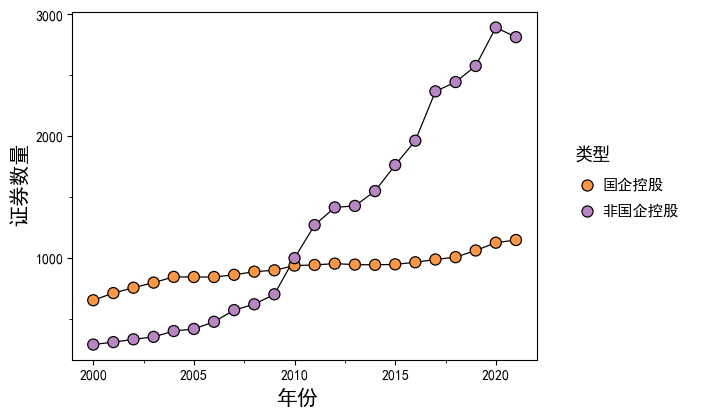

<ggplot: (-9223371925882317132)>

In [18]:
(
    ggplot(yeardf, aes(x='年份', y='数量', fill='类型')) 
    + geom_line()
    + geom_point(shape='o', size=4, color='black')
    + scale_fill_manual(values=('#FF9641','#B887C3'))
    + ylab('证券数量')
    + theme_matplotlib()
    + theme(aspect_ratio =0.75,dpi=100,figure_size=(6,3),
            axis_title=element_text(size=15,face="plain",color="black"),
            axis_text = element_text(size=10,face="plain",color="black"),
            legend_text = element_text(size=11,face="plain",color="black"),
            legend_title = element_text(size=13,face="plain",color="black"),
            legend_background=element_blank())
)

In [19]:
top_balance = processed_data[['Top1','Top5','Top10','Balance1','Balance2','SOE']]
top_balance['SOE'] = pd.Categorical(top_balance['SOE'], ordered=True, categories=[0,1])  

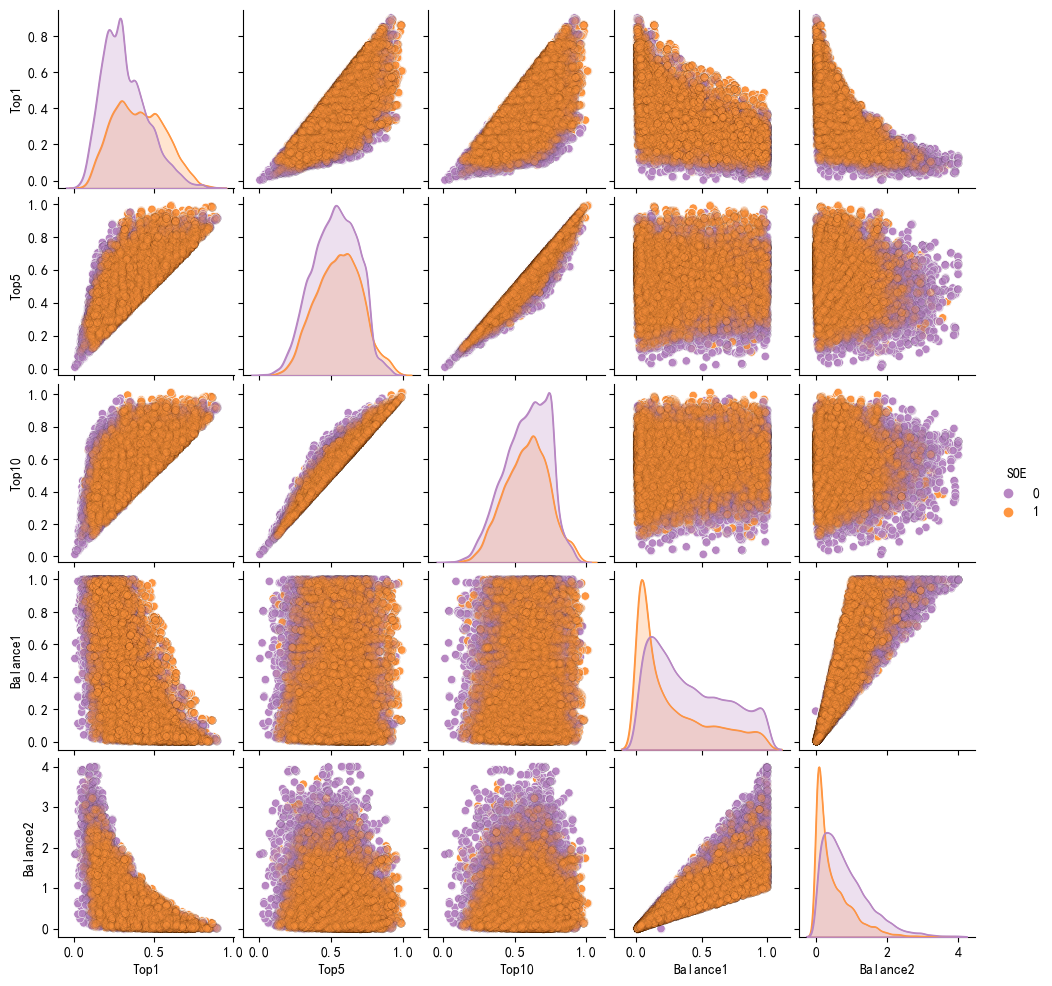

In [20]:
# 国企与非国企股权结构差异
g=sns.pairplot(top_balance[['Top1','Top5','Top10','Balance1','Balance2','SOE']], 
               hue="SOE",height=2,palette = {1:'#FF9641',0:'#B887C3'})   
g = g.map_diag(sns.kdeplot, lw=1, legend=False)
g = g.map_offdiag(plt.scatter, edgecolor="k", s=30, linewidth=0.2, alpha=0.1)

plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.show()

# 不同行业之间的表现差异

In [21]:
# 颜色设定
color=['#FFB6C1','#DB7093','#C71585','#8B008B','#9400D3','#9370DB','#6A5ACD','#483D8B','#0000CD','#1E90FF','#87CEFA','#B0E0E6',
       '#7FFFAA','#3CB371','#2E8B57','#32CD32','#ADFF2F','#FFFF00','#FFD700','#FFA500','#D2691E','#8B4513'] 

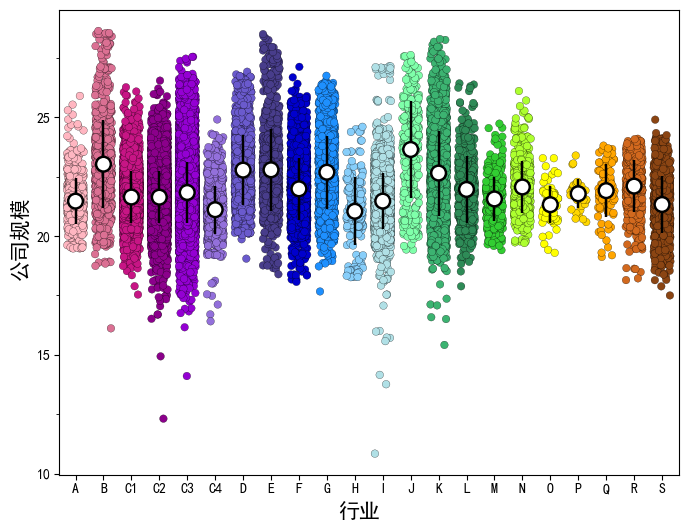

<ggplot: (-9223371925882557640)>

In [22]:
# 公司规模
industrydf = processed_data[['Industry','Size']]
(
    ggplot(industrydf,aes(x='Industry',y="Size",fill="Industry"))
    + geom_jitter(width=0.3,size=3,stroke=0.1,show_legend=False)
    + stat_summary(fun_data="mean_sdl", fun_args = {'mult':1},geom="pointrange", color = "black",size = 1,show_legend=False)
    + stat_summary(fun_data="mean_sdl", fun_args = {'mult':1},geom="point", fill="w",color = "black",size = 5,stroke=1,show_legend=False)
    + scale_fill_manual(color)
    + theme_matplotlib()
    + labs(x='行业',y='公司规模')
    + theme(aspect_ratio = 0.75,dpi=100,figure_size=(8,4),
            axis_title=element_text(size=15,face="plain",color="black"),
            axis_text = element_text(size=10,face="plain",color="black"))
)

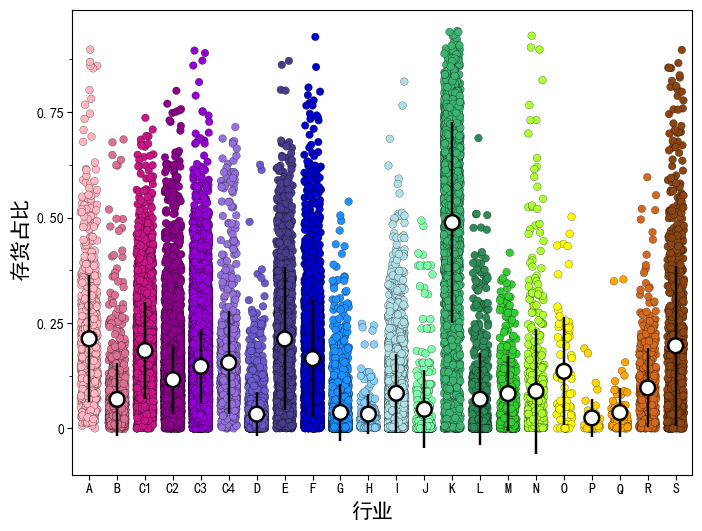

<ggplot: (-9223371925882231160)>

In [23]:
# 存货占比
industrydf = processed_data[['Industry','INV']]
(
    ggplot(industrydf,aes(x='Industry',y="INV",fill="Industry"))
    + geom_jitter(width=0.3,size=3,stroke=0.1,show_legend=False)
    + stat_summary(fun_data="mean_sdl", fun_args = {'mult':1},geom="pointrange", color = "black",size = 1,show_legend=False)
    + stat_summary(fun_data="mean_sdl", fun_args = {'mult':1},geom="point", fill="w",color = "black",size = 5,stroke=1,show_legend=False)
    + scale_fill_manual(color)
    + theme_matplotlib()
    + labs(x='行业',y='存货占比')
    + theme(aspect_ratio = 0.75,dpi=100,figure_size=(8,4),
            axis_title=element_text(size=15,face="plain",color="black"),
            axis_text = element_text(size=10,face="plain",color="black"))
)

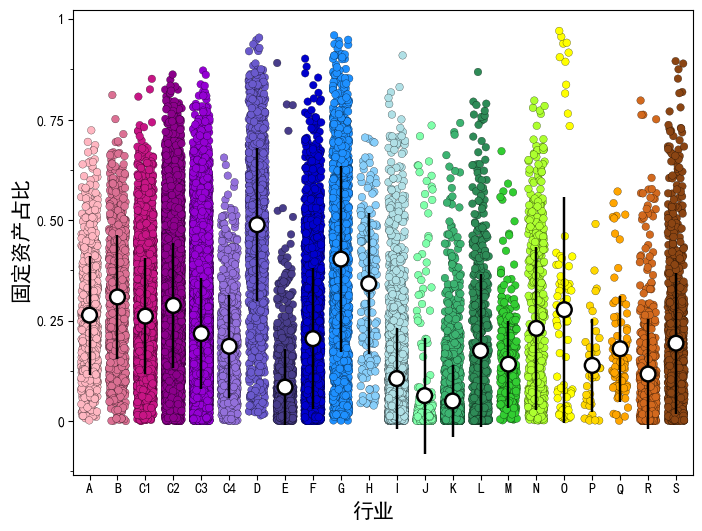

<ggplot: (-9223371925881724488)>

In [24]:
# 固定资产占比
industrydf = processed_data[['Industry','FIXED']]
industrydf = industrydf[industrydf['FIXED']>0]
(
    ggplot(industrydf,aes(x='Industry',y="FIXED",fill="Industry"))
    + geom_jitter(width=0.3,size=3,stroke=0.1,show_legend=False)
    + stat_summary(fun_data="mean_sdl", fun_args = {'mult':1},geom="pointrange", color = "black",size = 1,show_legend=False)
    + stat_summary(fun_data="mean_sdl", fun_args = {'mult':1},geom="point", fill="w",color = "black",size = 5,stroke=1,show_legend=False)
    + scale_fill_manual(color)
    + theme_matplotlib()
    + labs(x='行业',y='固定资产占比')
    + theme(aspect_ratio = 0.75,dpi=100,figure_size=(8,4),
            axis_title=element_text(size=15,face="plain",color="black"),
            axis_text = element_text(size=10,face="plain",color="black"))
)

In [25]:
# 计算从成立到上市的时间间隔
interdata = stk[['stkcd','listyear','firmyear']]
interdata['interval'] = interdata['listyear'] - interdata['firmyear']
interdata.sort_values(by = 'interval',inplace=True)
interdata.reset_index(drop=True, inplace = True)

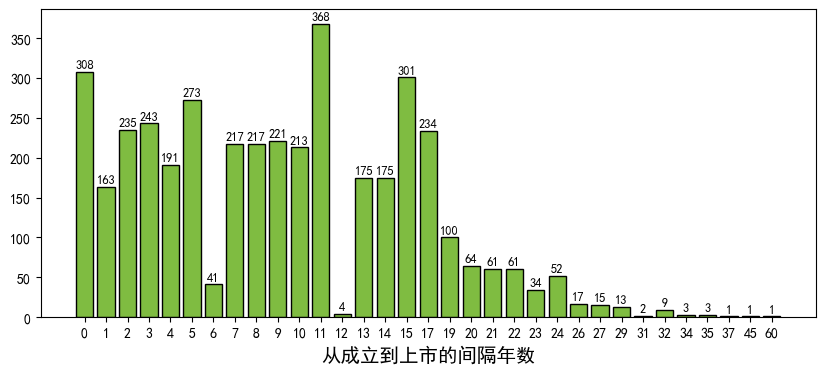

In [26]:
intervalyear = interdata.value_counts('interval').sort_index()
x = intervalyear.index.astype('str')
y = intervalyear.values

plt.figure(figsize = (10,4)) #设置图片大小
plt.bar(x,y,color = "#7FBC41",edgecolor='k') #绘制柱状图，表格给的数据是怎样就怎样，不会自动排序

plt.xlabel("从成立到上市的间隔年数",fontsize = 14) 
plt.tick_params(labelsize = 10) #设置标签字体大小

for a,b in zip(x,y):
    plt.text(a,b+2,b,ha = "center",va = "bottom",fontsize = 9) 

plt.show()

In [27]:
# 上市年限最长的企业对应的证券代码
interdata[interdata['interval'] == 60].stkcd

4015    603700
Name: stkcd, dtype: int64

In [28]:
# 平均上市年限
interdata['interval'].mean()

9.507221115537849

In [29]:
interdata = stk[['stkcd','listyear','firmyear']]
interdata['interval'] = interdata['listyear'] - interdata['firmyear']
try:
    interdata.drop(['listyear','firmyear'],axis=1,inplace=True)
except:
    pass

In [30]:
Industrychange = []  # 是否发生过行业转变
Industrynum = []     # 发生过行业转变的次数
Industrynew = []     # 将发生过行业转变的证券行业属性标记为"Un"
for i in newid:
    temp = processed_data[processed_data['stkcd'] == i]
    
    # 检查每个股票是否发生过行业变化
    industryset = set(temp['Industry'])
    if len(industryset) != 1:
        Industrychange.append(1)
        Industrynum.append(len(industryset))
        Industrynew.append('Un')
    else:
        Industrychange.append(0)
        Industrynum.append(1)
        Industrynew.append(temp['Industry'].iloc[0])

In [31]:
interdata['Industrynew'] = Industrynew
try:
    interdata.drop(['stkcd'],axis=1,inplace=True)
except:
    pass

interindustry = pd.DataFrame()
interindustry.index = intervalyear.index
industryclass = sorted(list(set(interdata['Industrynew'])))
for i in industryclass[:-1:]:
    stk3 = interdata[interdata['Industrynew'] == i]
    numdf = pd.DataFrame(stk3.value_counts('interval').sort_index(),columns=[i])
    interindustry = interindustry.join(numdf)
interindustry.fillna(0,inplace=True)
interindustry = interindustry.T
interindustry.reset_index(inplace=True)
interindustry.columns = ['行业'] + list(intervalyear.index)
interindustry = pd.melt(interindustry,id_vars='行业')
interindustry['行业']=pd.Categorical(interindustry['行业'], categories=industryclass[:-1:], ordered=True) #按照Sum_df.index的顺序
interindustry['variable']=pd.Categorical(interindustry['variable'], categories=intervalyear.index, ordered=True)

In [32]:
# 在全过程中未发生过行业类型转换的企业数目
len(interdata) - len(interdata[interdata['Industrynew'] == 'Un'])

3256

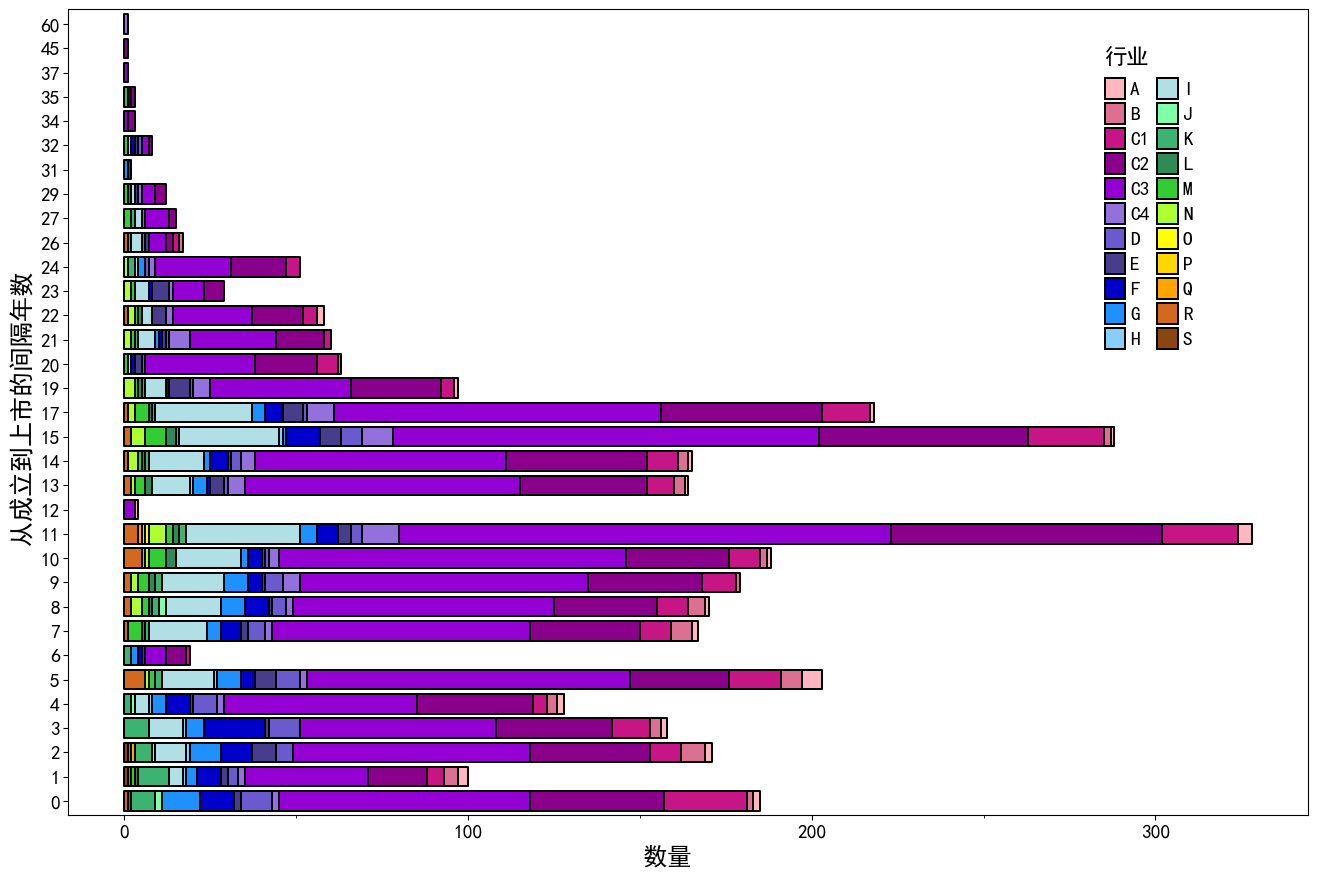

<ggplot: (-9223371925870744592)>

In [33]:
(
    ggplot(interindustry, aes(x='variable', y='value', fill='行业'))
    + geom_bar(stat='identity', color='k', position='stack', width=0.8, size=0.8)  #stack 是堆起来， dodge是并排放置, fill是上下填满
    + scale_fill_manual(color)
    + coord_flip()
    + theme_matplotlib()
    + labs(x='从成立到上市的间隔年数',y='数量')
    + theme(aspect_ratio = 0.65,dpi=100,figure_size=(16,10),
            axis_title=element_text(size=18,face="plain",color="black"),
            axis_text = element_text(size=14,face="plain",color="black"),
            legend_text = element_text(size=14,face="plain",color="black"),
            legend_title = element_text(size=16,face="plain",color="black"),
            legend_background=element_blank(),
            legend_position=(0.8,0.7))
    
)

In [34]:
# 不同行业的ROA时序图
ROAdata = pd.DataFrame()
ROAdata.index = np.arange(2000,2022,1)
normaldata = processed_data[(processed_data['ROA']<2) & (processed_data['ROA']>-2)]
for i in industryclass[:-1:]:
    temp = normaldata[normaldata['Industry'] == i]
    t = pd.DataFrame(temp.groupby('year').ROA.mean())
    t.columns = [i]
    ROAdata = ROAdata.join(t)
ROAdata.fillna(0,inplace=True)
ROAdata.reset_index(inplace=True)
ROAdata.columns = ['year'] + industryclass[:-1:]
ROAdata= pd.melt(ROAdata, id_vars='year')
ROAdata.columns = ['年份','行业','ROA']

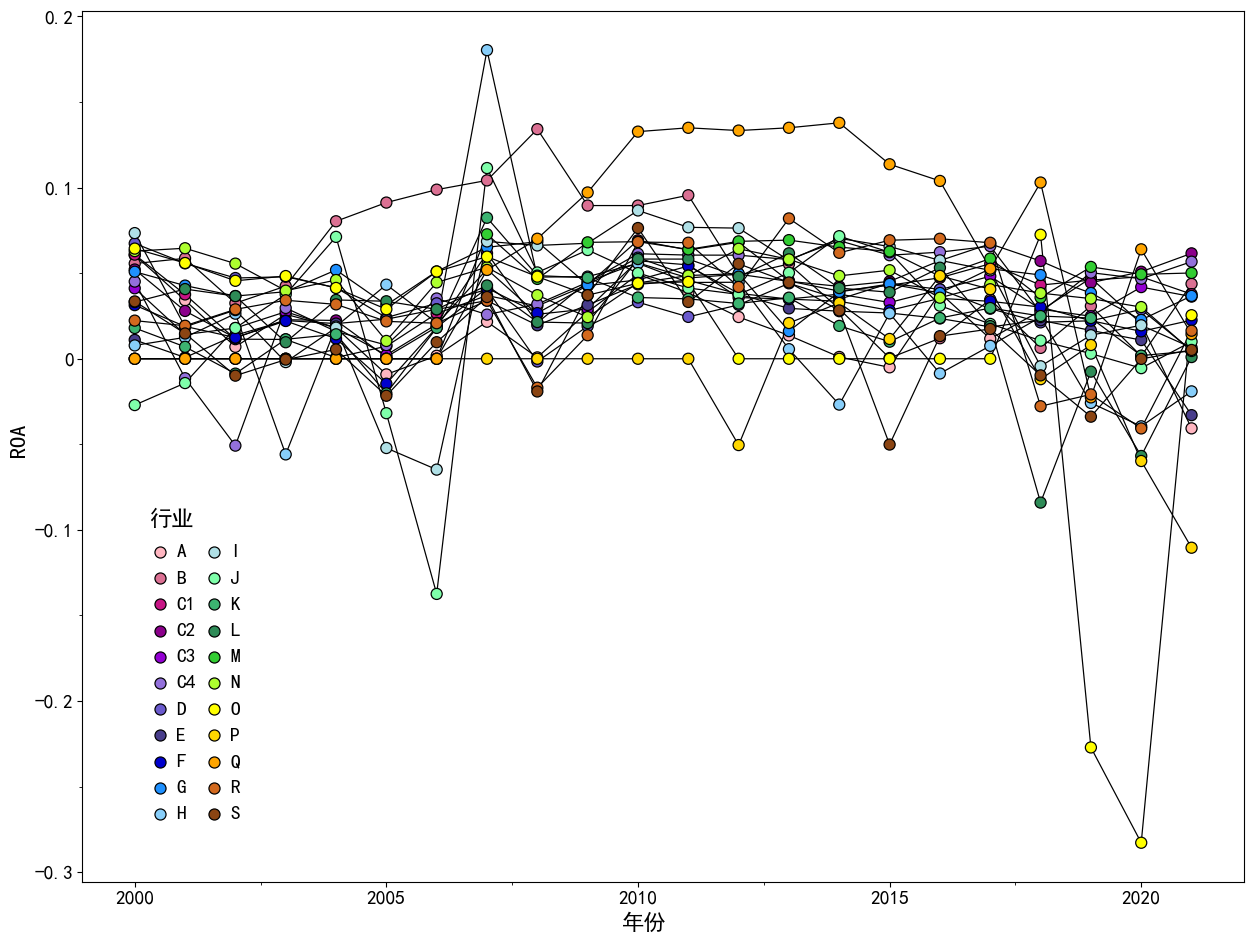

<ggplot: (-9223371925870754900)>

In [35]:
(
    ggplot(ROAdata, aes(x='年份', y='ROA', fill='行业')) 
    + geom_line()
    + geom_point(shape='o', size=4, color='black')
    + scale_fill_manual(color)
    + theme_matplotlib()
    + theme(aspect_ratio =0.75,dpi=100,figure_size=(15,8),
            axis_title=element_text(size=16,face="plain",color="black"),
            axis_text = element_text(size=14,face="plain",color="black"),
            legend_text = element_text(size=14,face="plain",color="black"),
            legend_title = element_text(size=16,face="plain",color="black"),
            legend_background=element_blank(),
            legend_position=(0.2,0.3))
)

In [36]:
# 不同行业的Cashflow坡度图
Cashflowdata = pd.DataFrame()
Cashflowdata.index = np.arange(2000,2022,1)
normaldata = processed_data[(processed_data['Cashflow']<1) & (processed_data['Cashflow']>0)]
for i in industryclass[:-1:]:
    temp = normaldata[normaldata['Industry'] == i]
    t = pd.DataFrame(temp.groupby('year').Cashflow.mean())
    t.columns = [i]
    Cashflowdata = Cashflowdata.join(t)
Cashflowdata.fillna(0,inplace=True)
Cashflowdata.reset_index(inplace=True)
Cashflowdata.columns = ['year'] + industryclass[:-1:]
Cashflowdata= pd.melt(Cashflowdata, id_vars='year')
Cashflowdata.columns = ['年份','行业','Cashflow']
Cashflowdata['行业'] = pd.Categorical(Cashflowdata['行业'], ordered=True, categories=industryclass[:-1:])

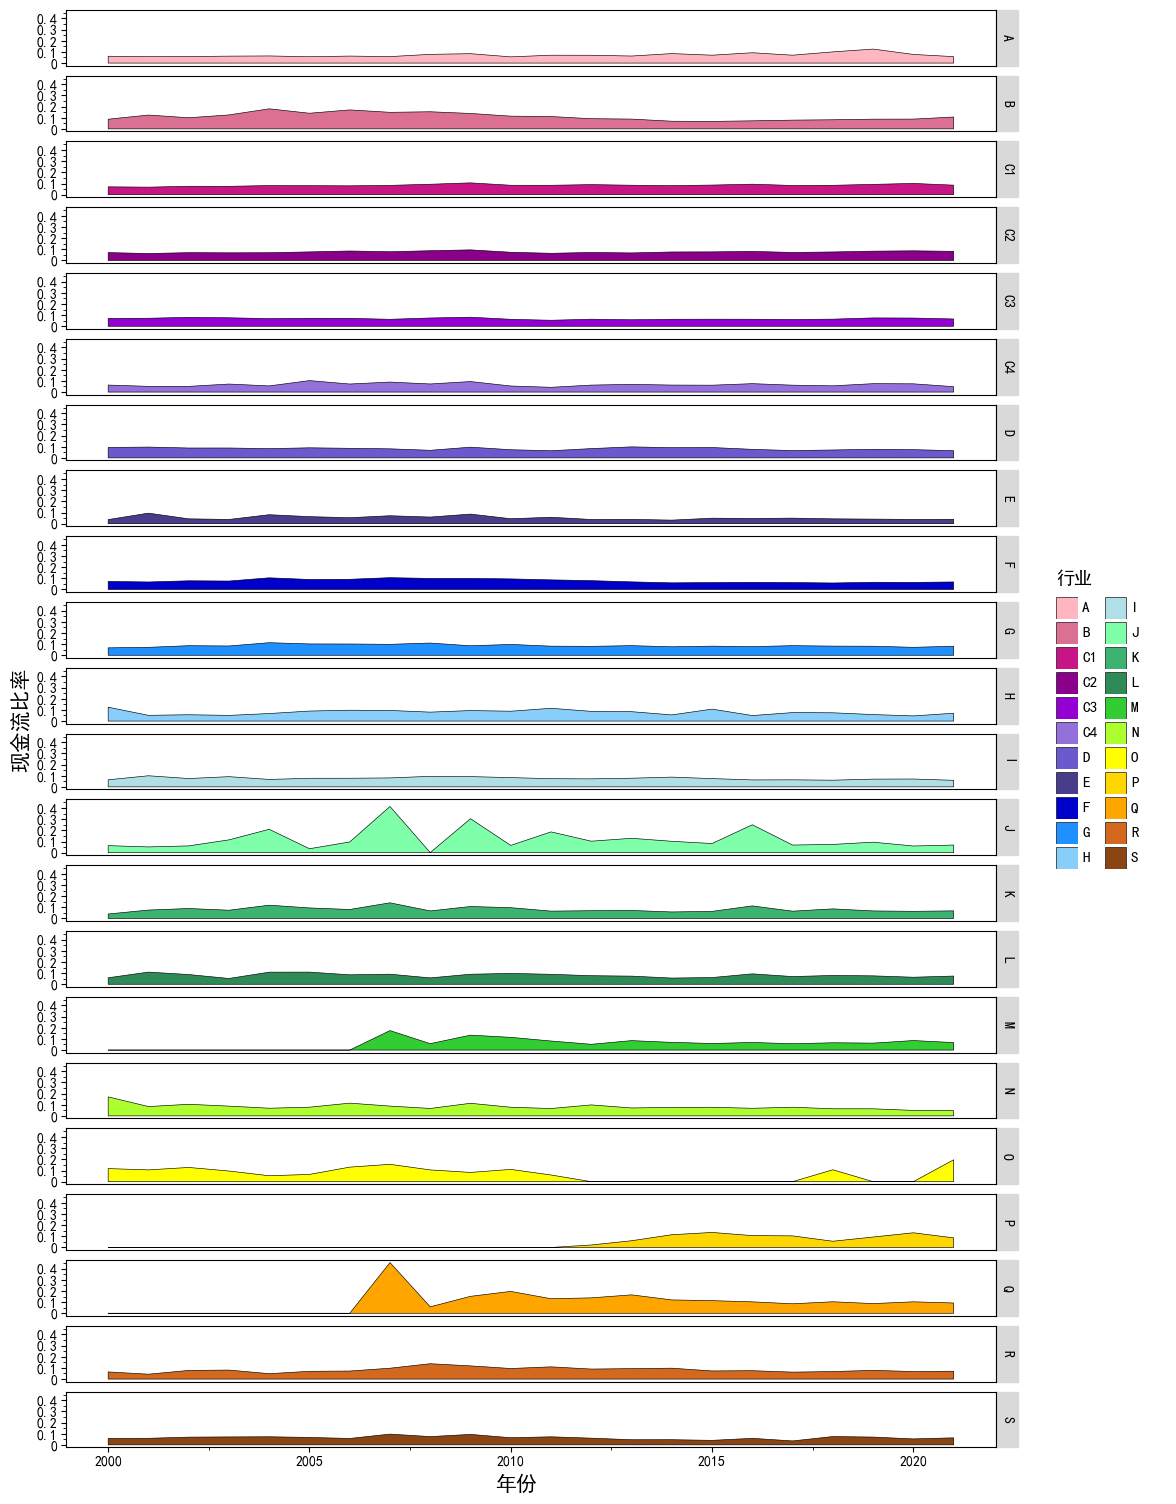

<ggplot: (-9223371925882245236)>

In [37]:
(
    ggplot(Cashflowdata,aes('年份','Cashflow',fill='行业'))
    + geom_area(color="black",size=0.25)
    + facet_grid('行业~.')
    + scale_fill_manual(color)
    + ylab('现金流比率')
    + theme_matplotlib()
    + theme(aspect_ratio =0.06,dpi=100,figure_size=(12,0.8),
            axis_title=element_text(size=15,face="plain",color="black"),
            axis_text = element_text(size=10,face="plain",color="black"),
            legend_text = element_text(size=11,face="plain",color="black"),
            legend_title = element_text(size=13,face="plain",color="black"),
            legend_background=element_blank())
)

# 行业D中数据完整的27支证券

In [38]:
#selstk = [27,37,531,539,543,600,601,692,767,899,993,1896,600098,600101,600116,600168,600283,600642,600644,600674,600719,600726,600744,
#          600780,600795,600863,600886]
Ddata_all = processed_data[processed_data['Industry'] == 'D']
Ddata = pd.DataFrame(data=None,columns=Ddata_all.columns)
Ddataid = sorted(list(set(Ddata_all['stkcd'])))
for i in Ddataid:
    temp = Ddata_all[Ddata_all['stkcd']==i]
    if len(temp) == 22:
        Ddata = Ddata.append(temp)
Ddata.reset_index(drop = True, inplace= True)

In [39]:
DLev = pd.DataFrame({'year':np.arange(2000,2022,1)})
Ddatasel = sorted(list(set(Ddata['stkcd'])))
for i in Ddatasel:
    temp = Ddata[Ddata['stkcd'] == i]
    temp.reset_index(drop=True,inplace=True)
    DLev[i] = temp['Lev']
melt_DLev = pd.melt(DLev,id_vars=["year"],var_name='股票代码',value_name='Lev')
melt_DLev['股票代码'] = pd.Categorical(melt_DLev['股票代码'],categories= Ddatasel,ordered=True)

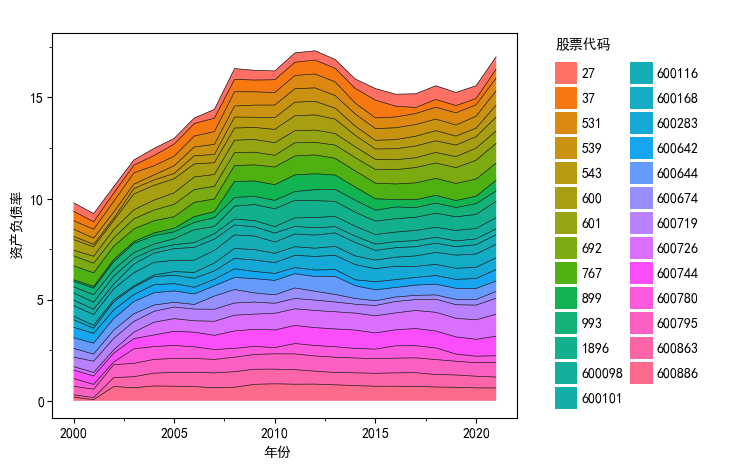

<ggplot: (-9223371925875919452)>

In [40]:
# D行业27个企业的资产负债率
(
    ggplot(melt_DLev, aes(x ='year', y = 'Lev',fill='股票代码',group='股票代码') )
    + geom_area(position="stack", alpha=1)
    + geom_line(position="stack", size=0.25, color="black")
    + scale_fill_hue(s = 0.99, l = 0.65, h=0.0417,color_space='husl')
    + xlab("年份")
    + ylab("资产负债率")
    + theme_matplotlib()
    + theme(figure_size = (6, 5),dpi = 100)
)

In [41]:
DBM = pd.DataFrame({'year':np.arange(2000,2022,1)})
Ddatasel = sorted(list(set(Ddata['stkcd'])))
for i in Ddatasel:
    temp = Ddata[Ddata['stkcd'] == i]
    temp.reset_index(drop=True,inplace=True)
    DBM[i] = temp['BM']
melt_DBM = pd.melt(DBM,id_vars=["year"],var_name='股票代码',value_name='BM')
melt_DBM['股票代码'] = pd.Categorical(melt_DBM['股票代码'],categories= Ddatasel,ordered=True)

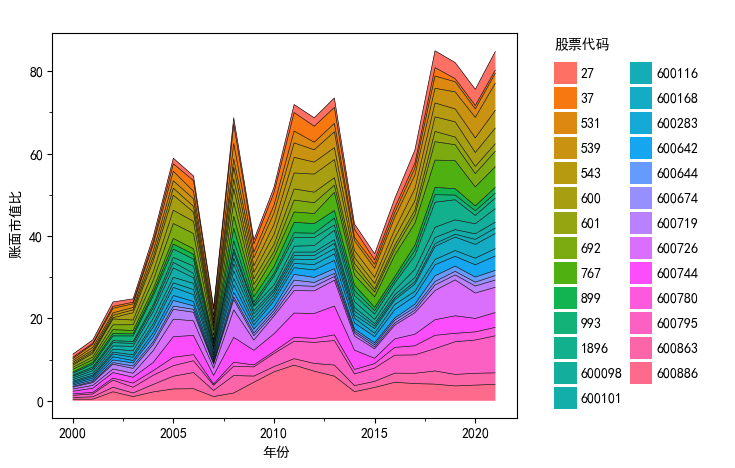

<ggplot: (-9223371925882207136)>

In [42]:
# D行业27个企业的账面市值比
(
    ggplot(melt_DBM, aes(x ='year', y = 'BM',fill='股票代码',group='股票代码') )
    + geom_area(position="stack", alpha=1)
    + geom_line(position="stack", size=0.25, color="black")
    + scale_fill_hue(s = 0.99, l = 0.65, h=0.0417,color_space='husl')
    + xlab("年份")
    + ylab("账面市值比")
    + theme_matplotlib()
    + theme(figure_size = (6, 5),dpi = 100)
)